In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score




In [2]:
df=pd.read_csv(r'C:\Users\ASUS\OneDrive\Msc_project\Hotel booking analysis\hotel_booking.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [6]:
# Drop unnecessary columns

columns_to_drop = ["name", "email", "phone-number", "credit_card","country"]
df_cleaned = df.drop(columns=columns_to_drop)

In [7]:
# Convert data types
df_cleaned["children"] = df_cleaned["children"].fillna(0).astype(int)
df_cleaned["reservation_status_date"] = pd.to_datetime(df_cleaned["reservation_status_date"])

In [8]:
# Check for duplicates and remove them
df_cleaned = df_cleaned.drop_duplicates()

In [9]:
# Set plot style
sns.set_style("whitegrid")

In [10]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

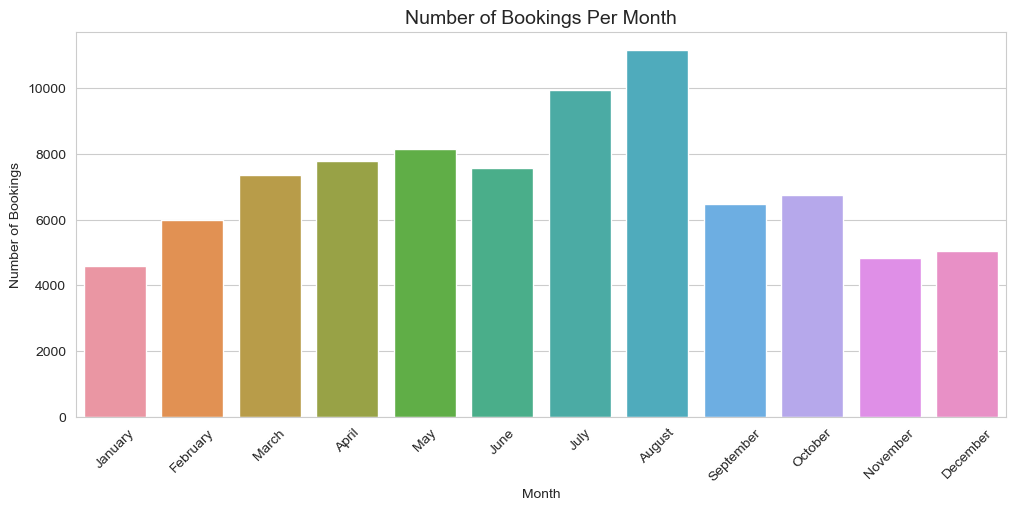

In [11]:
# 1. Booking Trends: Monthly Bookings
plt.figure(figsize=(12, 5))
sns.countplot(data=df_cleaned, x="arrival_date_month", order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"])
plt.title("Number of Bookings Per Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.xticks(rotation=45)
plt.show()

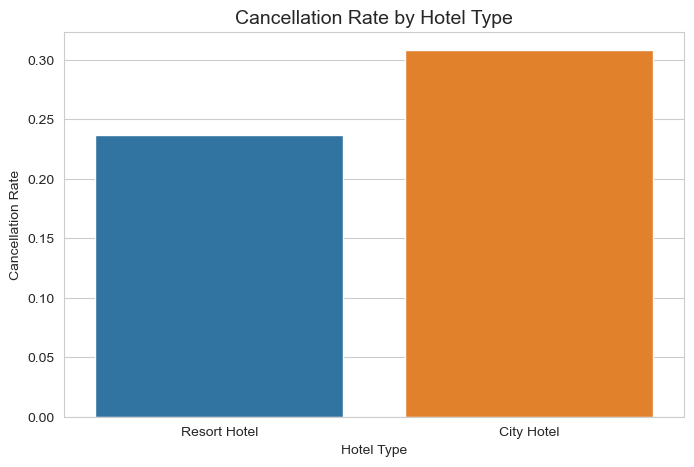

In [12]:
# 2. Cancellation Rates by Hotel Type
plt.figure(figsize=(8, 5))
sns.barplot(data=df_cleaned, x="hotel", y="is_canceled", ci=None)
plt.title("Cancellation Rate by Hotel Type", fontsize=14)
plt.xlabel("Hotel Type")
plt.ylabel("Cancellation Rate")
plt.show()

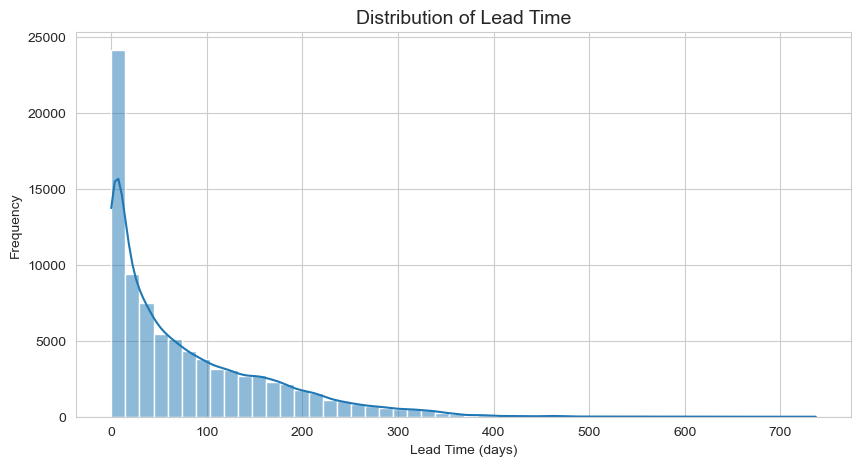

In [13]:
# 3. Distribution of Lead Time
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned["lead_time"], bins=50, kde=True)
plt.title("Distribution of Lead Time", fontsize=14)
plt.xlabel("Lead Time (days)")
plt.ylabel("Frequency")
plt.show()

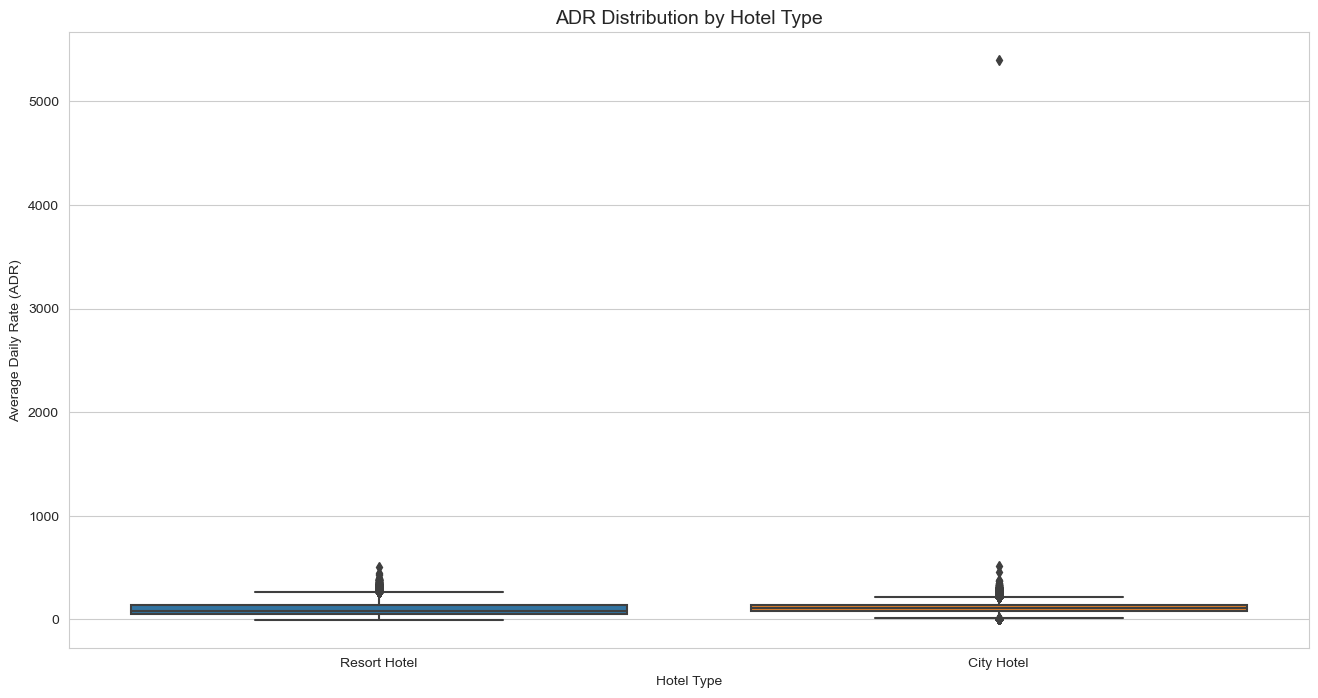

In [14]:
# 4. ADR (Average Daily Rate) Distribution
plt.figure(figsize=(16,8))
sns.boxplot(data=df_cleaned, x="hotel", y="adr")
plt.title("ADR Distribution by Hotel Type", fontsize=14)
plt.xlabel("Hotel Type")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

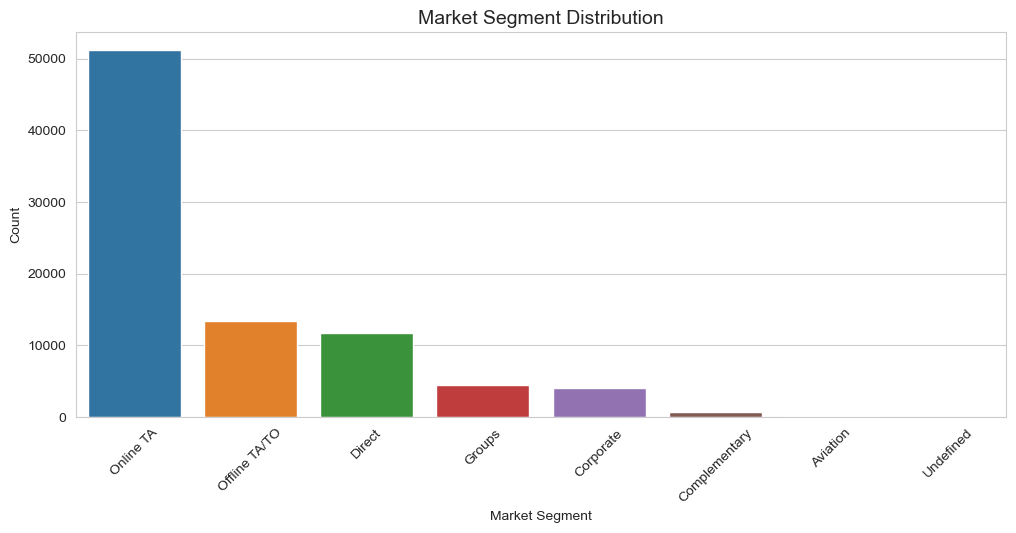

In [15]:
##Market Segment Distribution
plt.figure(figsize=(12, 5))
sns.countplot(data=df_cleaned, x="market_segment", order=df_cleaned["market_segment"].value_counts().index)
plt.title("Market Segment Distribution", fontsize=14)
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

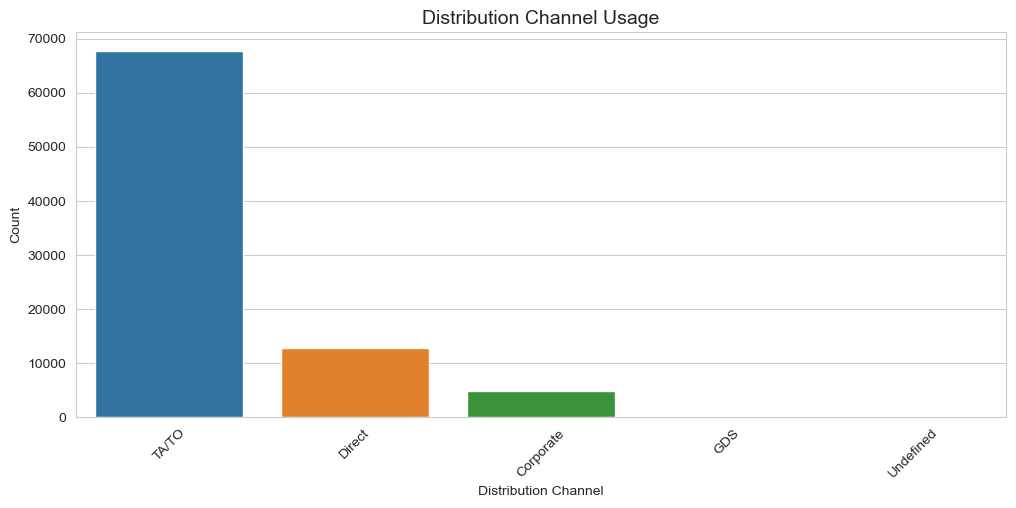

In [16]:
# 7. Distribution Channel Performance
plt.figure(figsize=(12, 5))
sns.countplot(data=df_cleaned, x="distribution_channel", order=df_cleaned["distribution_channel"].value_counts().index)
plt.title("Distribution Channel Usage", fontsize=14)
plt.xlabel("Distribution Channel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

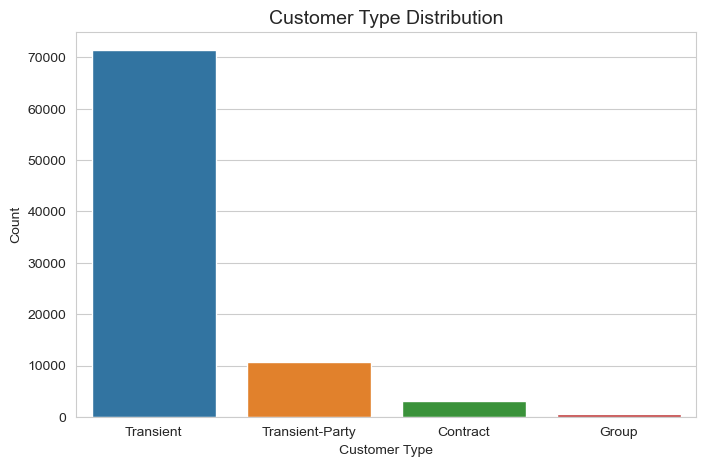

In [17]:
# 8. Customer Type Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x="customer_type", order=df_cleaned["customer_type"].value_counts().index)
plt.title("Customer Type Distribution", fontsize=14)
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.show()

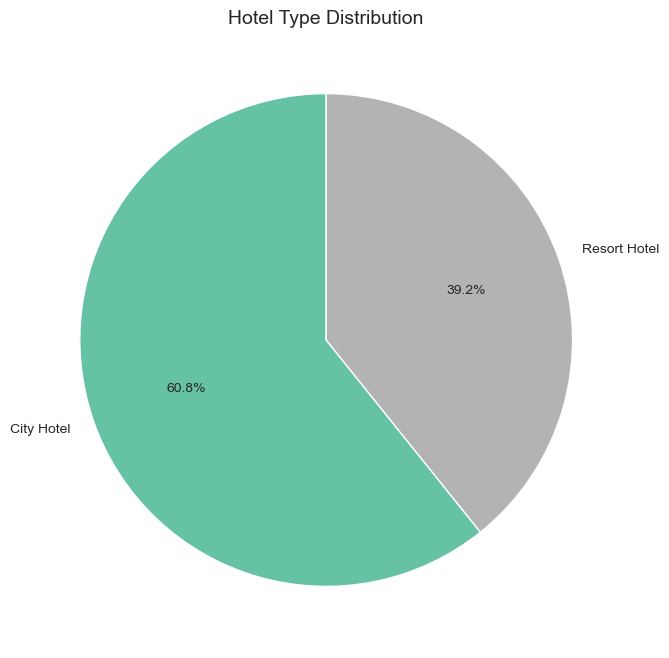

In [18]:
# 9. Pie Chart: Hotel Type Distribution
plt.figure(figsize=(8, 8))
df_cleaned["hotel"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, cmap="Set2")
plt.title("Hotel Type Distribution", fontsize=14)
plt.ylabel("")
plt.show()

In [19]:
# Aggregate daily bookings
time_series = df_cleaned.groupby("reservation_status_date").size()
time_series = time_series.asfreq("D").fillna(0)

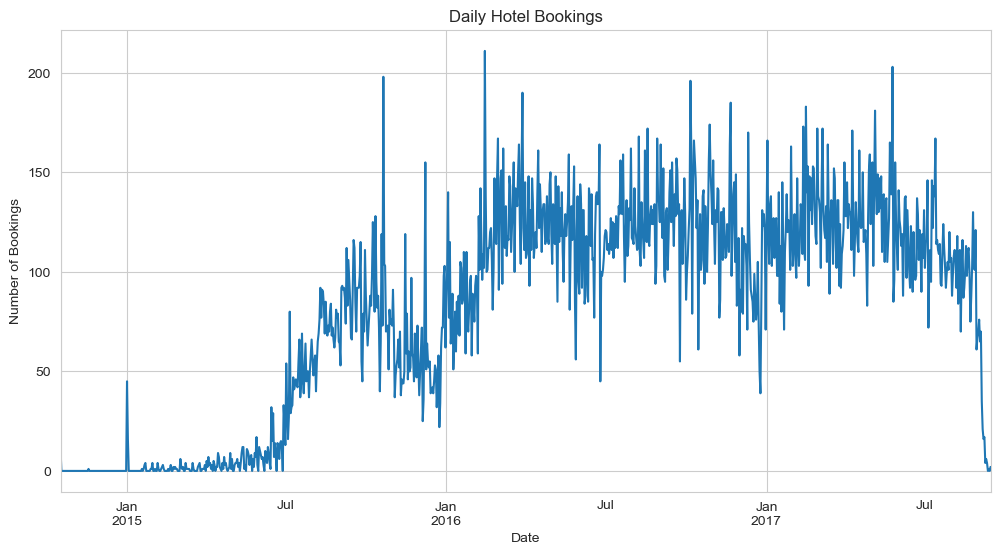

In [20]:
# Plot the time series
plt.figure(figsize=(12, 6))
time_series.plot(title="Daily Hotel Bookings")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.show()

In [21]:
# Augmented Dickey-Fuller Test
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The data is stationary.")
    else:
        print("The data is not stationary.")


In [22]:
adf_test(time_series)

ADF Statistic: -1.357743176624312
p-value: 0.6023586812274486
The data is not stationary.


In [23]:
# Differencing to make the series stationary
time_series_diff = time_series.diff().dropna()

In [24]:
adf_test(time_series_diff)

ADF Statistic: -9.150928810289823
p-value: 2.6879014364112097e-15
The data is stationary.


In [25]:
# Train-test split
train, test = train_test_split(time_series, test_size=0.2, shuffle=False)

In [26]:
# AR Model
ar_model = AutoReg(train,lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train) + len(test) - 1)

In [27]:
# MA Model
ma_model = SARIMAX(train, order=(0, 1, 1)).fit()
ma_forecast = ma_model.predict(start=len(train), end=len(train) + len(test) - 1)

In [28]:
# ARMA Model
arma_model = SARIMAX(train, order=(2, 0, 2)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train) + len(test) - 1)

In [29]:
# ARIMA Model
arima_model = ARIMA(train, order=(2, 1, 2)).fit()
arima_forecast = arima_model.forecast(steps=len(test))

In [30]:
# Calculate error metrics
def evaluate_forecast(true, predicted, model_name):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    mape = np.mean(np.abs((true - predicted) / true)) * 100
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    return mae, rmse, mape

In [31]:
ar_metrics = evaluate_forecast(test, ar_forecast, "AR Model")
ma_metrics = evaluate_forecast(test, ma_forecast, "MA Model")
arma_metrics = evaluate_forecast(test, arma_forecast, "ARMA Model")
arima_metrics = evaluate_forecast(test, arima_forecast, "ARIMA Model")

AR Model - MAE: 45.89, RMSE: 51.06, MAPE: inf%
MA Model - MAE: 24.46, RMSE: 35.41, MAPE: inf%
ARMA Model - MAE: 21.57, RMSE: 31.72, MAPE: inf%
ARIMA Model - MAE: 24.11, RMSE: 35.00, MAPE: inf%


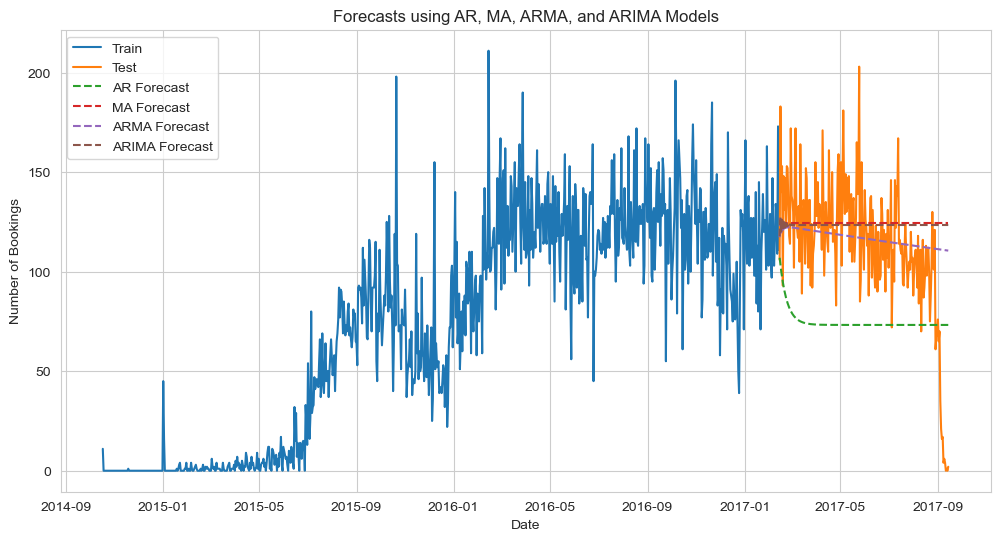

In [32]:
# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(test.index, ar_forecast, label="AR Forecast", linestyle="dashed")
plt.plot(test.index, ma_forecast, label="MA Forecast", linestyle="dashed")
plt.plot(test.index, arma_forecast, label="ARMA Forecast", linestyle="dashed")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", linestyle="dashed")
plt.legend()
plt.title("Forecasts using AR, MA, ARMA, and ARIMA Models")
plt.xlabel("Date")
plt.ylabel("Number of Bookings")
plt.show()

## ML

In [33]:
df_cleaned.select_dtypes('object')

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out
1,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient,Check-Out
2,Resort Hotel,July,BB,Direct,Direct,A,C,No Deposit,Transient,Check-Out
3,Resort Hotel,July,BB,Corporate,Corporate,A,A,No Deposit,Transient,Check-Out
4,Resort Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,August,BB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,Check-Out
119386,City Hotel,August,BB,Online TA,TA/TO,E,E,No Deposit,Transient,Check-Out
119387,City Hotel,August,BB,Online TA,TA/TO,D,D,No Deposit,Transient,Check-Out
119388,City Hotel,August,BB,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out


In [34]:
df_cleaned.drop(['reservation_status','reservation_status_date','company','agent'],axis=1,inplace=True)

In [35]:
df_cleaned.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [36]:
# Encode categorical variables
categorical_cols = ["hotel", "meal", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type","arrival_date_month"]
le = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

In [37]:
# Define features and target variable
features = df_cleaned.drop(columns=["is_canceled"])
target = df_cleaned["is_canceled"]

In [38]:
# Normalize numerical features
scaler = StandardScaler()
numeric_cols = ["lead_time", "adults", "children", "babies", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"]
features[numeric_cols] = scaler.fit_transform(features[numeric_cols])

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [40]:
# Train different models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [41]:
# Evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model.__class__.__name__} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")


In [42]:
for name, model in models.items():
    print(f"Evaluating {name}...")
    evaluate_model(model, X_train, X_test, y_train, y_test)

Evaluating Logistic Regression...
LogisticRegression - Accuracy: 0.75, Precision: 0.64, Recall: 0.25, F1-score: 0.36, ROC-AUC: 0.60
Evaluating Decision Tree...
DecisionTreeClassifier - Accuracy: 0.75, Precision: 0.55, Recall: 0.58, F1-score: 0.56, ROC-AUC: 0.70
Evaluating Random Forest...
RandomForestClassifier - Accuracy: 0.81, Precision: 0.72, Recall: 0.55, F1-score: 0.62, ROC-AUC: 0.73
Evaluating Gradient Boosting...
GradientBoostingClassifier - Accuracy: 0.80, Precision: 0.73, Recall: 0.45, F1-score: 0.56, ROC-AUC: 0.69
